In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

In [2]:
from darwinian_shift import DarwinianShift, hide_top_and_right_axes, plot_domain_structure
from darwinian_shift import CDFMonteCarloTest
from darwinian_shift import FoldXLookup, StructureDistanceLookup, MutationExclusionLookup

/Users/mh28/miniconda3/envs/dsenv3/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/mh28/miniconda3/envs/dsenv3/lib/python3.8/site-packages/MDAnalysis/coordinates/TRJ.py:1209: DeprecationWarning: Please use `netcdf_file` from the `scipy.io` namespace, the `scipy.io.netcdf` namespace is deprecated.
  class NCDFPicklable(scipy.io.netcdf.netcdf_file):


In [3]:
d_skin = DarwinianShift(
    data = pd.read_excel('248092_3_supp_6645104_q35h43.xlsx', sheet_name='Table S4', skiprows=4),
    source_genome='GRCh37',
    spectra='skin_trinuc_spectrum.txt',
    included_mutation_types='missense', 
    statistics=CDFMonteCarloTest(num_draws=100000)
)

In [4]:
d_oe = DarwinianShift(
    data=pd.read_excel('aau3879_TableS2.xlsx',
                       sheet_name='Mutations_collapsed_by_distance', skiprows=17),
    source_genome='GRCh37',
    spectra='oesophagus_trinuc_spectrum.txt',
    included_mutation_types='missense', 
    statistics=CDFMonteCarloTest(num_draws=100000)
)

# Missense mutation density across gene

In [5]:
# Colours 
dimerization_colour = '#0077BB'
wd40_colour = '#EE7733'
Fbox_colour = '#009988'
non_domain_colour = '#888888'  

In [6]:
fbx_skin = d_skin.make_section(gene='FBXW7')

In [7]:
last_residue = fbx_skin.null_mutations['residue'].max()

In [8]:
bins = [0, 233, 257, 277, 324, 377, 659]
colours = [None, dimerization_colour, None, 
           Fbox_colour, None, wd40_colour, None]

/var/folders/fz/0b7ldhcd0rb8rnh3wct1_92c000gly/T/ipykernel_28859/4168337808.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


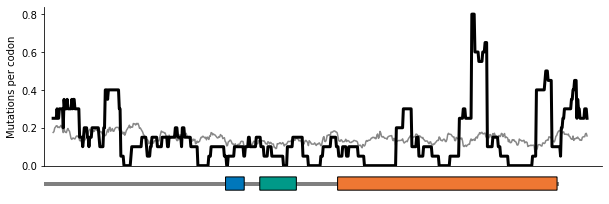

In [9]:
fig, (ax1, ax_dom) = plt.subplots(2, 1, figsize=(10, 3.5), sharex=True, 
                                       gridspec_kw={'height_ratios': (3, 0.5), 'hspace': 0.05})
linewidth = 1.3
fbx_skin.plot_sliding_window(figsize=(10, 3), ax=ax1, show_legend=False, colours=['k', non_domain_colour])
ax1.set_xlim([0, last_residue+10])
hide_top_and_right_axes(ax1)
ax1.set_xticks([])
ax1.set_xlabel('')

plot_domain_structure(bins, colours, height=1, ax=ax_dom)
ax_dom.set_xlim([0, last_residue+10])

plt.tight_layout()

In [10]:
fbx_oe = d_oe.make_section(gene='FBXW7')

/var/folders/fz/0b7ldhcd0rb8rnh3wct1_92c000gly/T/ipykernel_28859/3684869331.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


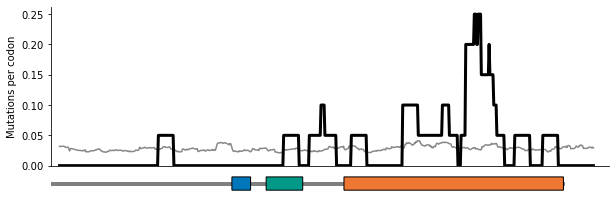

In [11]:
fig, (ax1, ax_dom) = plt.subplots(2, 1, figsize=(10, 3.5), sharex=True, 
                                       gridspec_kw={'height_ratios': (3, 0.5), 'hspace': 0.05})
linewidth = 1.3
fbx_oe.plot_sliding_window(figsize=(10, 3), ax=ax1, show_legend=False, colours=['k', non_domain_colour])
ax1.set_xlim([0, last_residue+10])
hide_top_and_right_axes(ax1)
ax1.set_xticks([])
ax1.set_xlabel('')

plot_domain_structure(bins, colours, height=1, ax=ax_dom)
ax_dom.set_xlim([0, last_residue+10])

plt.tight_layout()

# Selection

In [12]:
# Directories
sifts_directory="SIFTS_files"
pdb_directory = "PDB_files"

# Colours
unobserved_colour = '#BBBBBB'  
observed_colour = '#EE7733'
foldx_expected_colour = '#EE6677'
foldx_observed_colour = '#CC3311'
binding_site_expected_colour = '#88CCEE'
binding_site_observed_colour = '#0077BB'

In [13]:
section2ovq = {'gene': 'FBXW7', 'pdb_id': '2OVQ', 'pdb_chain': 'B', 'target_selection': 'protein and segid C'}

In [14]:
# Define the FoldX lookup
fold = FoldXLookup(foldx_results_directory="FoldX_results",
                   sifts_directory=sifts_directory,
                   foldx_file_name_start="PS_f*", download_sifts=True)

In [15]:
# Make a lookup to measure the distance from the mutation to the target selection (the substrate)
distance = StructureDistanceLookup(pdb_directory=pdb_directory, 
                            sifts_directory=sifts_directory)


In [16]:
# Make a lookup to test for a shift in ∆∆G distribution when excluding mutations around the substrate binding site
excllook_foldx = MutationExclusionLookup(
    lookup=fold,   # Use ∆∆G values for the test
    exclusion_lookup=distance,   
    exclusion_threshold=8,  #  Exclude mutations within 8A of the substrate
    exclusion_direction=-1,   
    name=fold.name
)

## Skin

In [17]:
s = d_skin.run_section(section2ovq, lookup=fold)
s.get_results_dictionary()

{'gene': 'FBXW7',
 'transcript_id': 'ENST00000281708',
 'chrom': '4',
 'section_id': '2OVQ:B',
 'num_mutations': 62,
 'observed_median': 0.385387,
 'observed_mean': 1.4650636129032255,
 'expected_median_glob_k3': 1.16988,
 'median_shift_glob_k3': -0.7844930000000001,
 'expected_mean_glob_k3': 3.7540049808622387,
 'mean_shift_glob_k3': -2.288941367959013,
 'CDF_MC_glob_k3_num_smaller_or_equal': 3,
 'CDF_MC_glob_k3_num_larger_or_equal': 99999,
 'CDF_MC_glob_k3_pvalue': 5.999940000599994e-05,
 'CDF_MC_glob_k3_cdf_mean': 0.3556319285048463}

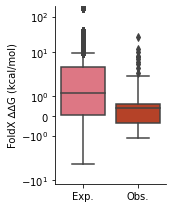

In [18]:
s.plot_boxplot(figsize=(2.5, 3), plot_scale='symlog',
                    colours=[foldx_observed_colour, foldx_expected_colour])
hide_top_and_right_axes()
plt.xticks(plt.gca().get_xticks(), ['Exp.', 'Obs.'])
plt.tight_layout()

In [19]:
s = d_skin.run_section(section2ovq, lookup=excllook_foldx)
s.get_results_dictionary()

{'gene': 'FBXW7',
 'transcript_id': 'ENST00000281708',
 'chrom': '4',
 'section_id': '2OVQ:B',
 'num_mutations': 30,
 'observed_median': 0.555693,
 'observed_mean': 2.9659416,
 'expected_median_glob_k3': 1.11418,
 'median_shift_glob_k3': -0.558487,
 'expected_mean_glob_k3': 3.7959027612811513,
 'mean_shift_glob_k3': -0.8299611612811515,
 'CDF_MC_glob_k3_num_smaller_or_equal': 27382,
 'CDF_MC_glob_k3_num_larger_or_equal': 72620,
 'CDF_MC_glob_k3_pvalue': 0.5476345236547635,
 'CDF_MC_glob_k3_cdf_mean': 0.46801457157674026}

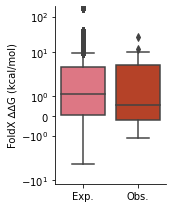

In [20]:
s.plot_boxplot(figsize=(2.5, 3), plot_scale='symlog',
                    colours=[foldx_observed_colour, foldx_expected_colour])
hide_top_and_right_axes()
plt.xticks(plt.gca().get_xticks(), ['Exp.', 'Obs.'])
plt.tight_layout()

In [21]:
s = d_skin.run_section(section2ovq, lookup=distance)
s.get_results_dictionary()

{'gene': 'FBXW7',
 'transcript_id': 'ENST00000281708',
 'chrom': '4',
 'section_id': '2OVQ:B',
 'num_mutations': 62,
 'observed_median': 7.261632049821395,
 'observed_mean': 15.113590785602986,
 'expected_median_glob_k3': 18.690202123775514,
 'median_shift_glob_k3': -11.42857007395412,
 'expected_mean_glob_k3': 21.880692780937512,
 'mean_shift_glob_k3': -6.767101995334526,
 'CDF_MC_glob_k3_num_smaller_or_equal': 1,
 'CDF_MC_glob_k3_num_larger_or_equal': 100001,
 'CDF_MC_glob_k3_pvalue': 1.999980000199998e-05,
 'CDF_MC_glob_k3_cdf_mean': 0.321955040405638}

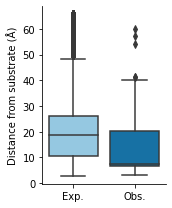

In [22]:
s.plot_boxplot(figsize=(2.5, 3), colours=[binding_site_observed_colour, binding_site_expected_colour])
hide_top_and_right_axes()
plt.xticks(plt.gca().get_xticks(), ['Exp.', 'Obs.'])
plt.ylabel('Distance from substrate (Å)')
plt.tight_layout()

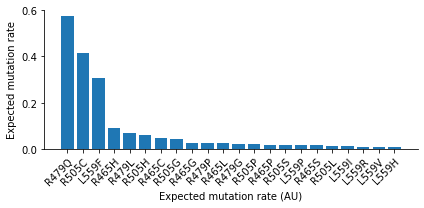

In [23]:
s.plot_expected_mutation_rates_for_residues_bar(residues=[559, 505, 479, 465], figsize=(6, 3), 
                                                  orientation='vertical')
hide_top_and_right_axes()
plt.xlabel('Expected mutation rate (AU)')
labels = plt.gca().get_xticklabels()
plt.xticks(rotation=45, ha='right')
dx = 7/72.;
offset = matplotlib.transforms.ScaledTranslation(dx, 0, plt.gcf().dpi_scale_trans)

for label in plt.gca().xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
    
plt.tight_layout()

## Oesophagus

In [24]:
s = d_oe.run_section(section2ovq, lookup=fold)
s.get_results_dictionary()

{'gene': 'FBXW7',
 'transcript_id': 'ENST00000281708',
 'chrom': '4',
 'section_id': '2OVQ:B',
 'num_mutations': 19,
 'observed_median': 0.734203,
 'observed_mean': 1.5263386842105262,
 'expected_median_glob_k3': 1.10232,
 'median_shift_glob_k3': -0.3681169999999999,
 'expected_mean_glob_k3': 3.528126328204911,
 'mean_shift_glob_k3': -2.001787643994385,
 'CDF_MC_glob_k3_num_smaller_or_equal': 29395,
 'CDF_MC_glob_k3_num_larger_or_equal': 70607,
 'CDF_MC_glob_k3_pvalue': 0.5878941210587895,
 'CDF_MC_glob_k3_cdf_mean': 0.4635828178548734}

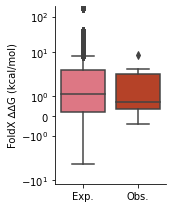

In [25]:
s.plot_boxplot(figsize=(2.5, 3), plot_scale='symlog',
                    colours=[foldx_observed_colour, foldx_expected_colour])
hide_top_and_right_axes()
plt.xticks(plt.gca().get_xticks(), ['Exp.', 'Obs.'])
plt.tight_layout()

In [26]:
s = d_oe.run_section(section2ovq, lookup=distance)
s.get_results_dictionary()

{'gene': 'FBXW7',
 'transcript_id': 'ENST00000281708',
 'chrom': '4',
 'section_id': '2OVQ:B',
 'num_mutations': 19,
 'observed_median': 13.19849058250975,
 'observed_mean': 17.59518197963915,
 'expected_median_glob_k3': 18.690202123775514,
 'median_shift_glob_k3': -5.491711541265763,
 'expected_mean_glob_k3': 21.83973498652623,
 'mean_shift_glob_k3': -4.244553006887081,
 'CDF_MC_glob_k3_num_smaller_or_equal': 4862,
 'CDF_MC_glob_k3_num_larger_or_equal': 95140,
 'CDF_MC_glob_k3_pvalue': 0.0972390276097239,
 'CDF_MC_glob_k3_cdf_mean': 0.38974798083225165}

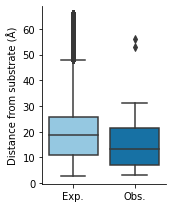

In [27]:
s.plot_boxplot(figsize=(2.5, 3), colours=[binding_site_observed_colour, binding_site_expected_colour])
hide_top_and_right_axes()
plt.xticks(plt.gca().get_xticks(), ['Exp.', 'Obs.'])
plt.ylabel('Distance from substrate (Å)')
plt.tight_layout()